Epoch 1/100
9/9 [==============================] - 1s 21ms/step - loss: 2.0369
Epoch 2/100
9/9 [==============================] - 0s 20ms/step - loss: 1.8302
Epoch 3/100
9/9 [==============================] - 0s 19ms/step - loss: 1.4704
Epoch 4/100
9/9 [==============================] - 0s 20ms/step - loss: 1.3340
Epoch 5/100
9/9 [==============================] - 0s 22ms/step - loss: 1.2934
Epoch 6/100
9/9 [==============================] - 0s 22ms/step - loss: 1.2496
Epoch 7/100
9/9 [==============================] - 0s 24ms/step - loss: 1.2116
Epoch 8/100
9/9 [==============================] - 0s 23ms/step - loss: 1.1675
Epoch 9/100
9/9 [==============================] - 0s 26ms/step - loss: 1.1185
Epoch 10/100
9/9 [==============================] - 0s 26ms/step - loss: 1.0701
Epoch 11/100
9/9 [==============================] - 0s 26ms/step - loss: 1.0191
Epoch 12/100
9/9 [==============================] - 0s 21ms/step - loss: 0.9682
Epoch 13/100
9/9 [==============================]

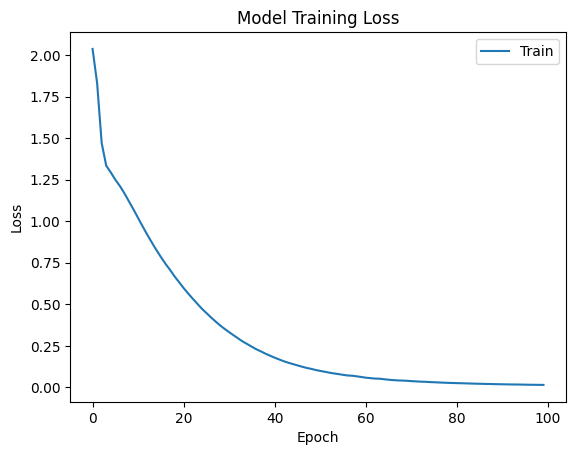

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Read data
lines = open("input.txt", "r").readlines()
input_texts, target_texts = [], []
for line in lines:
    input_text, target_text = line.split('*')
    input_texts.append(input_text.strip())
    target_texts.append(target_text.strip())

# Create a vocabulary
all_texts = ' '.join(input_texts + target_texts)
vocab = sorted(set(all_texts))
vocab_size = len(vocab)

# Map chars to integers and vice versa
char2idx = {char: idx for idx, char in enumerate(vocab)}
idx2char = {idx: char for char, idx in char2idx.items()}

# Convert texts to one-hot encoded
def text_to_one_hot(text):
    vector = np.zeros((len(text), vocab_size))
    for i, char in enumerate(text):
        vector[i, char2idx[char]] = 1
    return vector

input_data = [text_to_one_hot(text) for text in input_texts]
target_data = [text_to_one_hot(text) for text in target_texts]

# Pad data for consistent shape
max_sequence_len = max(max([len(text) for text in input_texts]), max([len(text) for text in target_texts]))

input_data = tf.keras.preprocessing.sequence.pad_sequences(input_data, maxlen=max_sequence_len, padding='post')
target_data = tf.keras.preprocessing.sequence.pad_sequences(target_data, maxlen=max_sequence_len, padding='post')

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(max_sequence_len, vocab_size)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(max_sequence_len * vocab_size, activation='softmax'),
    tf.keras.layers.Reshape((max_sequence_len, vocab_size))
])

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy')
history = model.fit(input_data, target_data, epochs=100)

#Plot the training graph
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

# Save model weights to CSV
for i, weight in enumerate(model.get_weights()):
    np.savetxt(f'weight_{i}.csv', weight, delimiter=',')


In [2]:
import numpy as np

# Load data for vocab and other parameters
lines = open("input.txt", "r").readlines()
input_texts, target_texts = [], []
for line in lines:
    input_text, target_text = line.split('*')
    input_texts.append(input_text.strip())
    target_texts.append(target_text.strip())

# Create a vocabulary
all_texts = ' '.join(input_texts + target_texts)
vocab = sorted(set(all_texts))
vocab_size = len(vocab)

# Map chars to integers and vice versa
char2idx = {char: idx for idx, char in enumerate(vocab)}
idx2char = {idx: char for char, idx in char2idx.items()}

max_sequence_len = max(max([len(text) for text in input_texts]), max([len(text) for text in target_texts]))

# Convert texts to one-hot encoded
def text_to_one_hot(text):
    vector = np.zeros((len(text), vocab_size))
    for i, char in enumerate(text):
        vector[i, char2idx[char]] = 1
    return vector

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=-1, keepdims=True)

def relu(x):
    return np.maximum(0, x)

def matrix_multiply(A, B):
    return np.matmul(A, B)

def text_to_one_hot(text):
    vector = np.zeros((len(text), vocab_size))
    for i, char in enumerate(text):
        vector[i, char2idx[char]] = 1
    return vector

# Load weights
weights = [np.loadtxt(f'weight_{i}.csv', delimiter=',') for i in range(4)]

input_text = "hello world."
input_data = text_to_one_hot(input_text)
input_data = np.pad(input_data, ((0, max_sequence_len - len(input_text)), (0, 0)))

one_hot_encoded = text_to_one_hot(input_text)
flattened_one_hot = one_hot_encoded.reshape(-1)

# Save to CSV
np.savetxt("input_one_hot_flattened.csv", flattened_one_hot, delimiter=",")

# For your reference:
print(f"Vocab Size: {vocab_size}")
print(f"Max Text Length: {max_sequence_len}")

# Inference
flattened = input_data.reshape(1, -1)
dense1 = relu(matrix_multiply(flattened, weights[0]) + weights[1])
output = softmax(matrix_multiply(dense1, weights[2]) + weights[3])
output = output.reshape(max_sequence_len, vocab_size)

translated_chars = [idx2char[np.argmax(vec)] for vec in output]
translated_text = ''.join(translated_chars).strip()
print(translated_text)


Vocab Size: 56
Max Text Length: 52
Nous ailonrens  usique.aes..nt.me dn r.nu.nnée.gne..


In [3]:
input_text = "her cat had work"
input_data = text_to_one_hot(input_text)
input_data = np.pad(input_data, ((0, max_sequence_len - len(input_text)), (0, 0)))

# Inference
flattened = input_data.reshape(1, -1)
dense1 = relu(matrix_multiply(flattened, weights[0]) + weights[1])
output = softmax(matrix_multiply(dense1, weights[2]) + weights[3])
output = output.reshape(max_sequence_len, vocab_size)

translated_chars = [idx2char[np.argmax(vec)] for vec in output]
translated_text = ''.join(translated_chars).strip()
print(translated_text)

Le sett no eounelr deuo..rne ...e enus.eu.e.s..vae..
